In [1]:
# Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [2]:
# Load the datasets
customers = pd.read_csv(r"C:\Users\utkar\Desktop\Zeotap\Customers (1).csv")
transactions = pd.read_csv(r"C:\Users\utkar\Desktop\Zeotap\Transactions.csv")

In [3]:
# print the first 5 rows of the customers dataframe
customers.head(5)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
# print the first 5 rows of the transactions dataframe before Merge
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [5]:
# Merge transactions with customers
transactions = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID')

In [6]:
# print the first 5 rows of the transactions dataframe After Merge
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Region
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Europe
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Asia
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Europe
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,South America
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Europe


# Feature Engineering

In [7]:
# Create a customer profile based on transaction history
customer_profile = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'  
}).reset_index()

In [8]:
# Merge with customer information
customer_profile = customer_profile.merge(customers[['CustomerID', 'Region']], on='CustomerID')

In [9]:
# transforming a categorical variable into a numerical representation by One-hot encode the Region 
customer_profile = pd.get_dummies(customer_profile, columns=['Region'], drop_first=True)

In [10]:
# Normalize the features
scaler = StandardScaler()
features = scaler.fit_transform(customer_profile[['TotalValue', 'Quantity', 'TransactionID']])

# Clustering

In [11]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
db_indices = []

In [12]:
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features, kmeans.labels_))
    db_indices.append(davies_bouldin_score(features, kmeans.labels_))


Text(0, 0.5, 'Inertia')

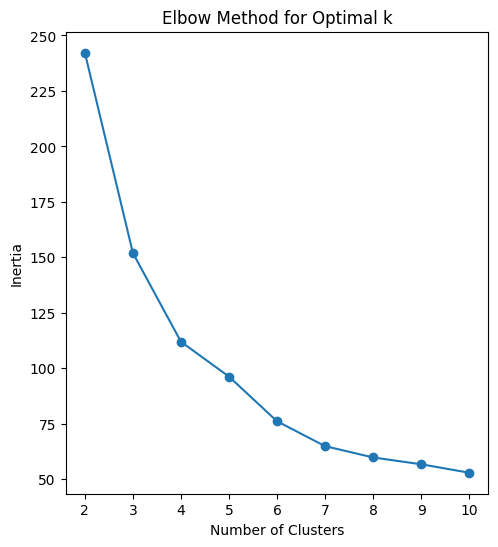

In [13]:
# Plot the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

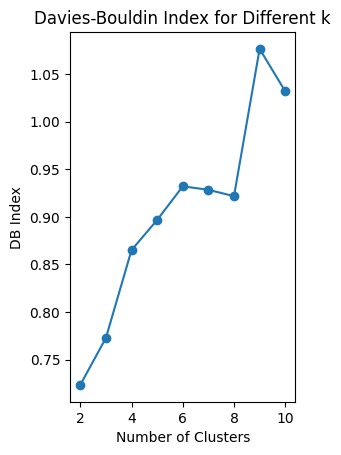

In [14]:
# Plot the Davies-Bouldin Index
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), db_indices, marker='o')
plt.title('Davies-Bouldin Index for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.show()

In [15]:
# Choose the optimal number of clusters 
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(features)

In [16]:
# Calculate clustering metrics
db_index = davies_bouldin_score(features, customer_profile['Cluster'])
silhouette_avg = silhouette_score(features, customer_profile['Cluster'])

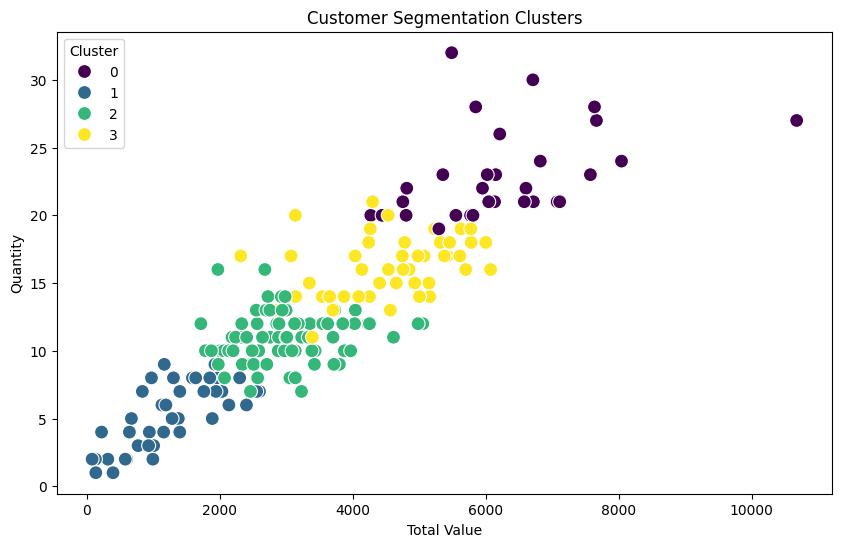

In [17]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_profile['TotalValue'], y=customer_profile['Quantity'], hue=customer_profile['Cluster'], palette='viridis', s=100)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()

In [18]:
# Output results
print(f'Number of clusters formed: {optimal_clusters}')
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')

Number of clusters formed: 4
Davies-Bouldin Index: 0.8650620583623065
Silhouette Score: 0.37356460556541055
